In [141]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [142]:
import numpy as np
import pandas as pd

In [143]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [144]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [145]:
# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

In [146]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [147]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [148]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [149]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [150]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [151]:
trip_start = dt.date(2018,10,1)
trip_end = dt.date(2018,10,15)

In [152]:
results = engine.execute("select max(date) from measurement;").fetchall()
print(results)

[('2017-08-23',)]


In [153]:
# Find the last date in the measurement table
max_date = results[0][0]
print(f"Last date in measurement {max_date}")

Last date in measurement 2017-08-23


In [154]:
# convert str type date to a datetime type
max_date = dt.datetime.strptime(max_date, '%Y-%m-%d').date()
#print(f"Start of a year's worth of data: {max_date}")

In [155]:
today = date.today()
year_ago = today.replace(year = today.year - 1)
print( f"A year ago: {year_ago} & today: {today}")

A year ago: 2017-09-29 & today: 2018-09-29


In [156]:
first_date = max_date.replace(year = max_date.year - 1)
print(f"first_date is: {first_date} and max_date is: {max_date}" )

first_date is: 2016-08-23 and max_date is: 2017-08-23


In [157]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sql12 = """Select *
From measurement
Where date >= '{}'
       AND
      date <= '{}'
""".format(first_date, max_date)
print(sql12)

Select *
From measurement
Where date >= '2016-08-23'
       AND
      date <= '2017-08-23'



In [158]:
#read the table for the dates selected.
results = engine.execute(sql12).fetchall()
print(results[0])

(2364, 'USC00519397', '2016-08-23', 0.0, 81.0)


In [160]:
# build the dataframe from a dictionary of lists...
id_l =[]
station_l = []
date_l = []
prcp_l = []
tobs_l = []

for r in results:
    id_l.append(r[0])
    station_l.append(r[1])
    date_l.append(r[2])
    prcp_l.append(r[3])
    tobs_l.append(r[4])

In [161]:
d = { 'id': id_l, 'station': station_l, 'date': date_l, 'prcp': prcp_l, 'tobs': tobs_l }

In [162]:
# build dataframe
df = pd.DataFrame( d )


In [163]:
# Originally found some nan values for the prcp & tobs columns. Counts in df.info were not the same
# and the 2 columns were listed os objects instead fo float64.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 5 columns):
id         2230 non-null int64
station    2230 non-null object
date       2230 non-null object
prcp       2021 non-null float64
tobs       2230 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 87.2+ KB


In [164]:
# nan values will be replaced with 0.0, in the 'df' dataframe
df.fillna(0.0,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 5 columns):
id         2230 non-null int64
station    2230 non-null object
date       2230 non-null object
prcp       2230 non-null float64
tobs       2230 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 87.2+ KB


In [165]:
# Sort the dataframe by date
# convert the string date to a date first
df['date'] =pd.to_datetime(df.date)
# now sort by date.
df_date = df.sort_values(by=['date'])
df_date.head()


,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1009,8825,USC00517948,2016-08-23,0.00,80.0
1529,14608,USC00519281,2016-08-23,1.79,77.0
704,7331,USC00514830,2016-08-23,0.05,80.0
361,5091,USC00513117,2016-08-23,0.15,76.0


In [184]:
# Rename the date & prcp columns

In [166]:
df_d2 = df_date.rename(index=str, columns={"date": "Date", "prcp": "Precipitation"})
df_d2.head()

,id,station,Date,Precipitation,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1009,8825,USC00517948,2016-08-23,0.00,80.0
1529,14608,USC00519281,2016-08-23,1.79,77.0
704,7331,USC00514830,2016-08-23,0.05,80.0
361,5091,USC00513117,2016-08-23,0.15,76.0


In [167]:
# an attempt to build a query to list in descending order the stations with the most activity.
# query = session.query(Measurement.station, func.count(Measurement.station).label('Cnt')).group_by(Measurement.station) 
# .order_by('Cnt')
# session.query(Measurement).all()
# for Measurement in query:
#     print(f"Measurement.station: {Measurement.station} Count: {Measurement.count}")


<IPython.core.display.Javascript object>


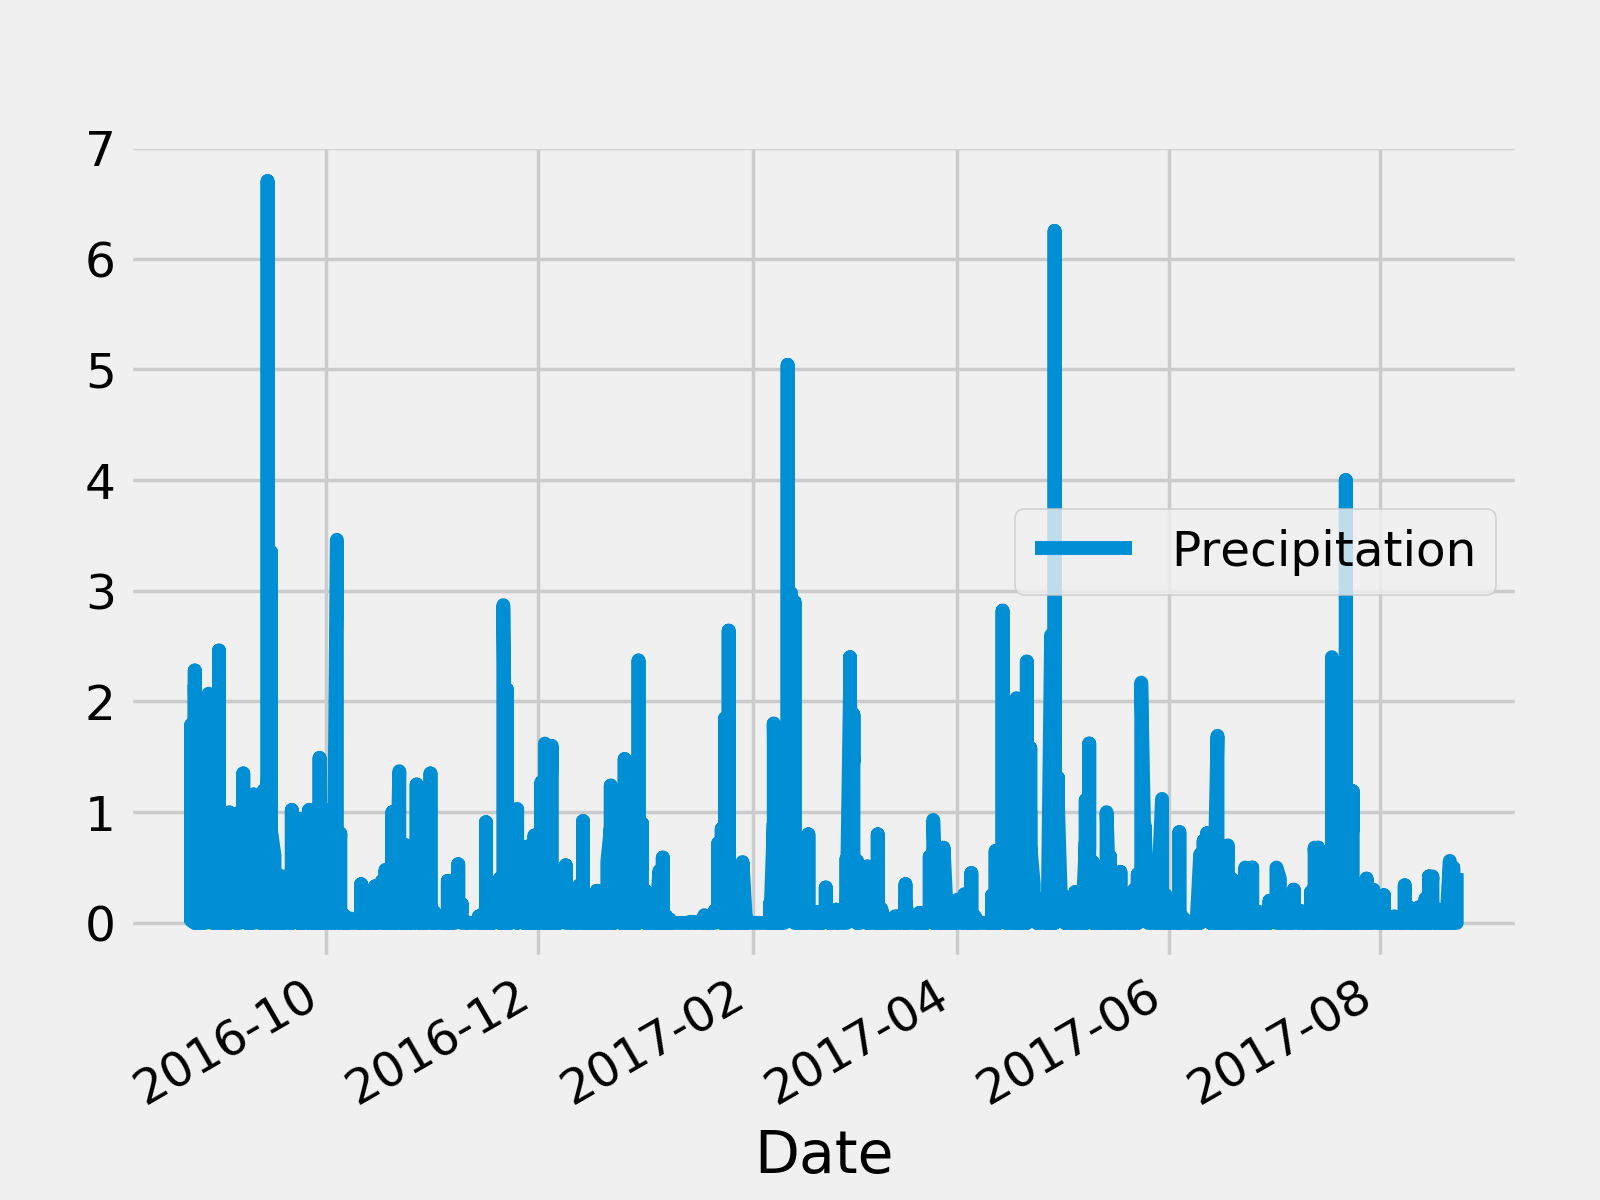

In [168]:
df_d2.plot(x='Date', y='Precipitation' )

![precipitation](Images/precipitation.png)

In [169]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_d2.describe()

,id,Precipitation,tobs
count,2230.000000,2230.000000,2230.000000
mean,10158.570404,0.160664,74.590583
std,5603.500203,0.442067,4.611667
min,2364.000000,0.000000,58.000000
25%,5287.250000,0.000000,72.000000
50%,8930.500000,0.010000,75.000000
75%,14750.750000,0.110000,78.000000
max,19550.000000,6.700000,87.000000


In [170]:
# Start of the temperature processing
#
# How many stations are available in this dataset?
session.query(func.count(Station.id)).scalar()

9

In [208]:
# Load the tdf dataframe with all of the measurement table
sql = 'select * from measurement'
tdf = pd.read_sql_query(sql, engine.connect())

In [209]:
tdf.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [214]:
# nan values will be replaced with 0.0, in the 'df' dataframe
tdf.fillna(0.0,inplace = True)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
id         19550 non-null int64
station    19550 non-null object
date       19550 non-null object
prcp       19550 non-null float64
tobs       19550 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [215]:
# What are the most active stations?
gb = tdf.groupby(['station'])
cnt_df = gb.size().to_frame(name='counts').sort_values(['counts'], ascending = False)

In [216]:
# List the stations and the counts in descending order.
cnt_df.head(10)

,counts
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [222]:
Station dataframe (s_df) only has rows for staton id: USC00519281
s_df = tdf.loc[tdf['station'] == 'USC00519281']
s_df.head()
#s_df.tail()

,id,station,date,prcp,tobs
12187,12188,USC00519281,2010-01-01,0.15,70.0
12188,12189,USC00519281,2010-01-02,0.00,62.0
12189,12190,USC00519281,2010-01-03,0.00,74.0
12190,12191,USC00519281,2010-01-04,0.00,75.0
12191,12192,USC00519281,2010-01-05,0.00,74.0


In [225]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
s_df.agg({'tobs': ['min', 'mean', 'max']})

,tobs
min,54.000000
mean,71.663781
max,85.000000


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

[(54.0, 85.0, 71.66378066378067)]

In [230]:
# Choose the station with the highest number of temperature observations.
tgb = tdf.loc[tdf.tobs > 0].groupby(['station'])
tcnt_df = tgb.size().to_frame(name='counts').sort_values(['counts'], ascending = False)

In [231]:
# tcnt_df has the ordered counts of all non-zero temperature observations (tobs)
# the station with the largest number of non-zero observations is 'USC00519281'
# this is the same station that had the most activity...
tcnt_df.head(10)

,counts
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [233]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# df_d2 has the last 12 months of measurement from eariler in this script.  
df_d2.head()

,id,station,Date,Precipitation,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1009,8825,USC00517948,2016-08-23,0.00,80.0
1529,14608,USC00519281,2016-08-23,1.79,77.0
704,7331,USC00514830,2016-08-23,0.05,80.0
361,5091,USC00513117,2016-08-23,0.15,76.0


In [234]:
# Filter the df to have only the station to be charted.
st_df = df_d2.loc[df_d2['station'] == 'USC00519281']
st_df.head(10)

,id,station,Date,Precipitation,tobs
1529,14608,USC00519281,2016-08-23,1.79,77.0
1530,14609,USC00519281,2016-08-24,2.15,77.0
1531,14610,USC00519281,2016-08-25,0.06,80.0
1532,14611,USC00519281,2016-08-26,0.01,80.0
1533,14612,USC00519281,2016-08-27,0.12,75.0
1534,14613,USC00519281,2016-08-28,0.60,73.0
1535,14614,USC00519281,2016-08-29,0.35,78.0
1536,14615,USC00519281,2016-08-30,0.00,77.0
1537,14616,USC00519281,2016-08-31,0.24,78.0
1538,14617,USC00519281,2016-09-01,0.02,80.0


<IPython.core.display.Javascript object>


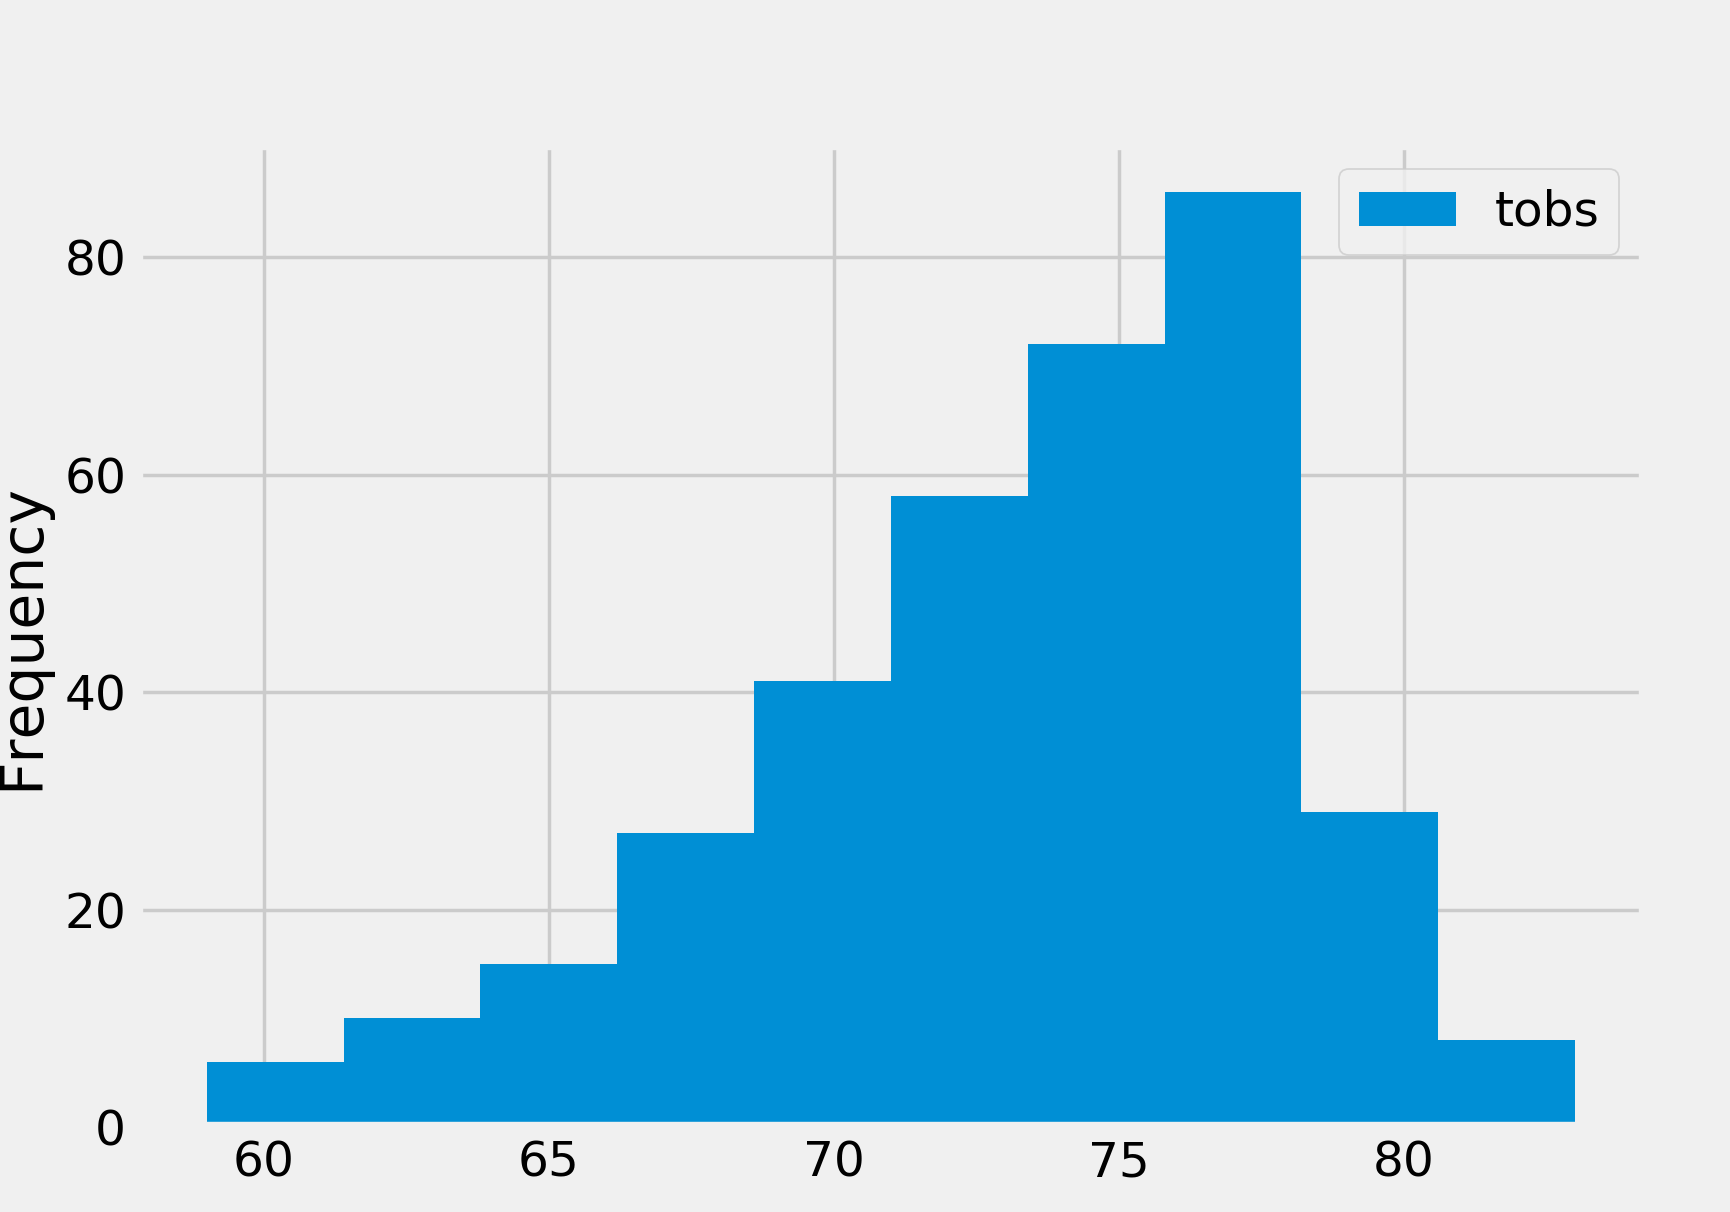

In [235]:
st_df.plot.hist(x='Date', y='tobs' )

![station-histogram](Images/station-histogram.png)

In [236]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


In [237]:
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [239]:
# trip_start = dt.date(2017,10,1) trip_end = dt.date(2017,10,15) from above..


In [240]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-10-01', '2016-10-05'))

[(73.0, 78.27272727272727, 81.0)]


In [243]:
pd.DataFrame.plot.bar(y=(73.0, 78.27272727272727, 81.0))

TypeError: bar() missing 1 required positional argument: 'self'

<IPython.core.display.Javascript object>


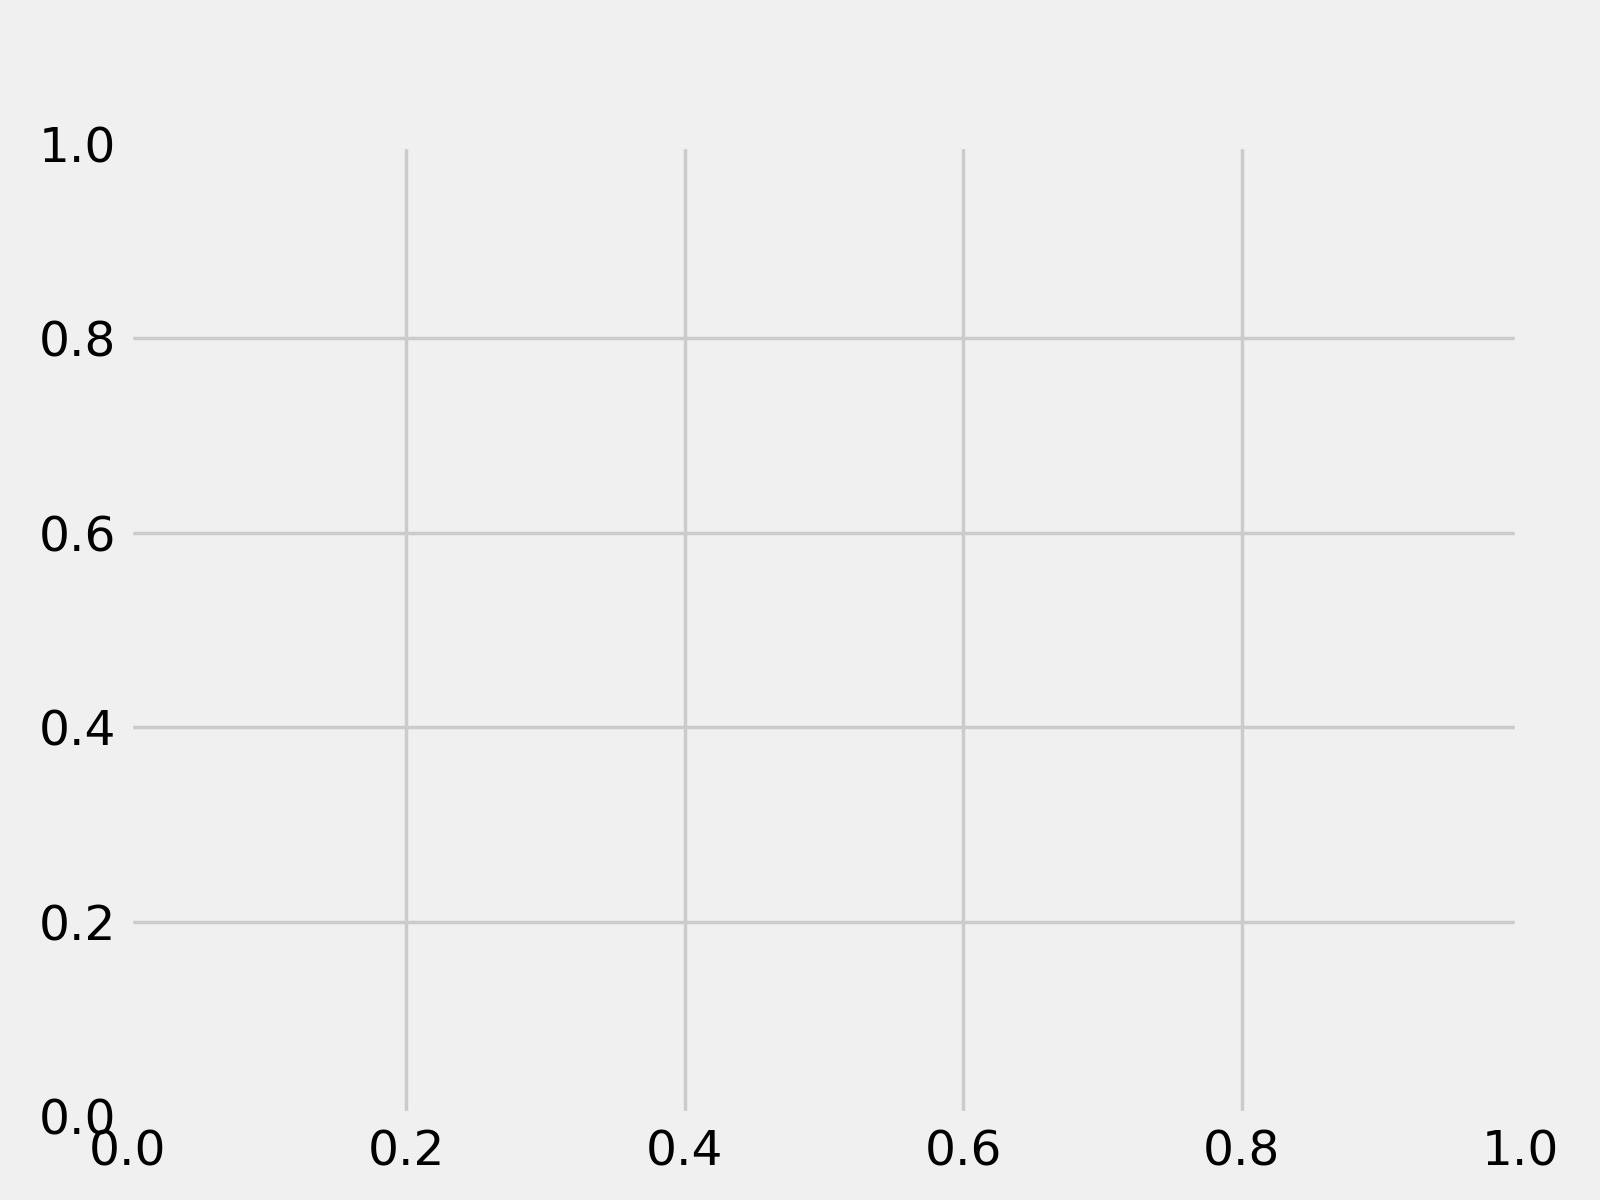

AttributeError: 'tuple' object has no attribute 'get_figure'

In [250]:
d_f = pd.DataFrame({"Trip": [0], "Temp (F)":[78.27]} )
ax = plt.subplots()
d_f.plot( x = 'Trip', y = 'Temp (F)', title = 'Trip Ave Temp',kind = 'bar', ax = ax, rot=0)

In [ ]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
>>> ax = df.plot.bar(x='lab', y='val', rot=0)

<IPython.core.display.Javascript object>


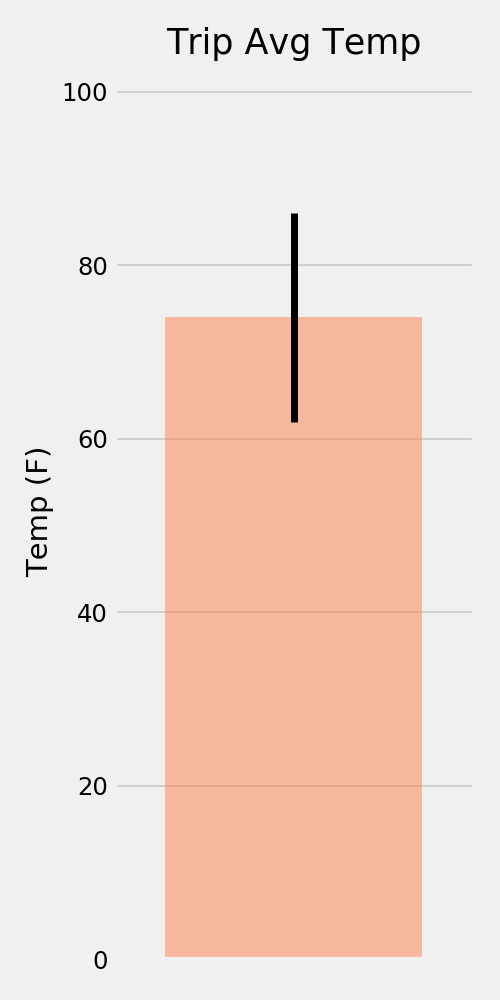

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


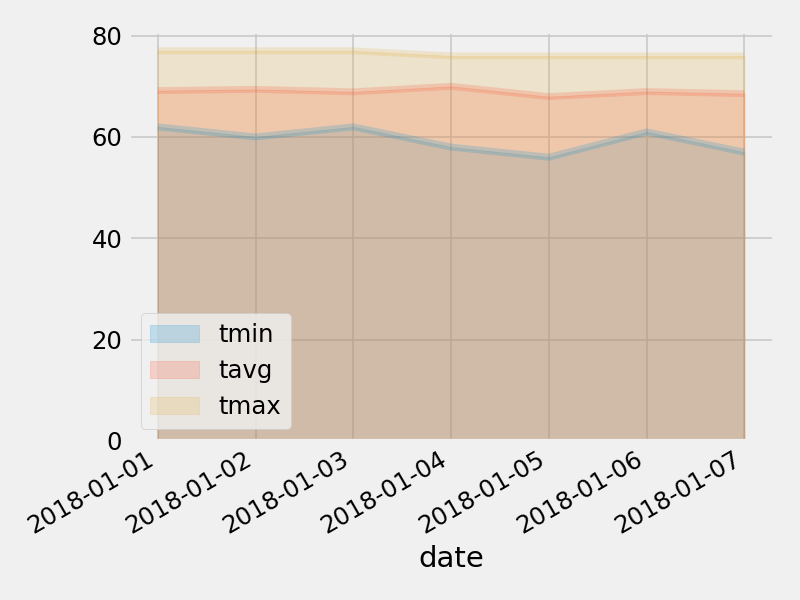

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
